<a href="https://colab.research.google.com/github/magana272/Machine_Learning/blob/main/HW4_FA25_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS6140 - Machine Learning, Fall 2025**
##**Homework 4**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**Oct 20th, 2025**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions.
</p>

This homework has two parts:
1. In the first part, you are required to implement a linear regression and report the metrics.
2. In the second part, you need to implemet supervised learning methods for a classification problem.

In [ ]:
#@markdown ### Enter your first and last names below:
First_Name = "Manuel" #@param {type:"string"}
Last_Name = "Magana" #@param {type:"string"}

#**Part one: Comparing Models for Home Prices**

Real estate websites like Zillow use models to estimate US home prices, aiding buyers and sellers. The dataset contains 76 home sales near Seattle, with features like price, size, bedrooms, bathrooms, construction year, and garage size. A data scientist aims to compare two regression models: simple linear (square footage) and multiple linear (size, year, bedrooms, bathrooms, garage). Interaction and polynomial terms are excluded. Models will be trained on one set and tested on another.  


**Import the home prices dataset and fit two house price prediction models (a simple and a multiple linear regression models), and calculate metrics: RMSE, MAE and R-squared for each model**

In [ ]:
# Import required packages and functions
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
import seaborn as sns

import zlib, json
# Set seed and test proportion
seed = 123
test_p = 0.20
# Import data
homes = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/homes.csv').dropna()

In [ ]:
# Linear regression model
lr_model = LinearRegression()
# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_p, random_state = seed)

# Metrics for simple linear regression
lr_model.fit(X_train, y_train)

# Predict
y_test_prdiction = lr_model.predict(X_test)
# R2
R_squared = lr_model.score(X_test, y_test)
#MSE
MSE = mean_squared_error(y_test, y_test_prdiction)
# RMSE
RMSE = mean_squared_error(y_test, y_test_prdiction)**(1/2)
# MAE
MAE = mean_absolute_error(y_test, y_test_prdiction)
print(f"MSE = {MSE}\nMAE = {MAE}\nR-squared = {R_squared}")



MSE = 4377.548634520407
MAE = 53.02646796077678
R-squared = 0.07881601353080447


In [ ]:
# Multiple regression model
Multiple_regression_model = LinearRegression()
# Define input and output features
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_p, random_state = seed)

Multiple_regression_model.fit(X_train, y_train)
# Predict
y_test_prdiction = Multiple_regression_model.predict(X_test)

# Metrics for multiple regression

# R2
R_squared = Multiple_regression_model.score(X_test, y_test)
#MSE
MSE = mean_squared_error(y_test, y_test_prdiction)
# RMSE
RMSE = mean_squared_error(y_test, y_test_prdiction)**(1/2)
# MAE
MAE = mean_absolute_error(y_test, y_test_prdiction)
print(f"MSE = {MSE}\nMAE = {MAE}\nR-squared = {R_squared}")

MSE = 4033.191050802188
MAE = 51.55650002967879
R-squared = 0.15128047211818518


**Cross-validation with Regression Models**  

**Perform cross-validation to assess both linear and multiple regression models.**


In [ ]:
# Fit simple linear regression model
m = LinearRegression()
X = homes[['Floor']]
y = homes[['Price']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_p, random_state = seed)
# 10-fold cross-validation scores
kf = KFold(n_splits=10)
lr_10_kf_res =  []
for train, test in kf.split(X):
  X_train_kf = X.iloc[train]
  X_test_kf = X.iloc[test]
  y_train_kf = y.iloc[train]
  y_test_kf = y.iloc[test]

  m.fit(X_train_kf, y_train_kf)

  predicted_y = m.predict(X_test_kf)
  MSE = mean_squared_error(y_test_kf, predicted_y)
  lr_10_kf_res.append([np.round(MSE, 6), "Linear", "10-fold"])


# Leave-one-out cross-validation scores

loo = LeaveOneOut()
lr_loo_res = []
for i, (train_index, test_index) in enumerate(loo.split(X)):
  X_train_loo = X.iloc[train_index]
  y_train_loo = y.iloc[train_index]
  X_test_loo = X.iloc[test_index]
  y_test_loo = y.iloc[test_index]
  m.fit(X_train_loo, y_train_loo)
  predicted_y = m.predict(X_test_loo)
  MSE = mean_squared_error(y_test_loo, predicted_y)
  lr_loo_res.append([np.round(MSE, 6), "Linear", "LOOCV"])



In [ ]:
# Fit multiple regression model

X= homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# 10-fold cross-validation scores
kf = KFold(n_splits=10)
mr_10_kf_res = []
for train, test in kf.split(X):
  X_train = X.iloc[train]
  y_train = y.iloc[train]

  X_test = X.iloc[test]
  y_test = y.iloc[test]
  # Fit
  m.fit(X_train, y_train)
  # Predict
  predicted_y = m.predict(X_test)
  # MSE
  MSE = mean_squared_error(y_test, predicted_y)
  mr_10_kf_res.append([np.round(MSE, 6), "Multiple", "10-fold"])


# Leave-one-out cross-validation scores
loo = LeaveOneOut()
mr_loo_res = []
for i, (train_index, test_index) in enumerate(loo.split(X)):
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]

  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

  m.fit(X_train, y_train)
  predicted_y = m.predict(X_test)
  MSE = mean_squared_error(y_test, predicted_y)
  mr_loo_res.append([np.round(MSE, 6), "Multiple", "LOOCV"])


In [ ]:
# Combine cross-validation results into a single dataframe

res = lr_10_kf_res +  lr_loo_res + mr_10_kf_res + mr_loo_res
results = pd.DataFrame(data = res, columns=["MSE","Model", "CV"])
results = results.round({"MSE":6})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(results.to_markdown())


|     |          MSE | Model    | CV      |
|----:|-------------:|:---------|:--------|
|   0 | 10074.3      | Linear   | 10-fold |
|   1 |  2001.67     | Linear   | 10-fold |
|   2 |  2294.95     | Linear   | 10-fold |
|   3 |  2324.13     | Linear   | 10-fold |
|   4 |  2144.58     | Linear   | 10-fold |
|   5 |  3077        | Linear   | 10-fold |
|   6 |  4152.18     | Linear   | 10-fold |
|   7 |  2462.95     | Linear   | 10-fold |
|   8 |  3111.33     | Linear   | 10-fold |
|   9 |  4076.14     | Linear   | 10-fold |
|  10 |  8580.81     | Linear   | LOOCV   |
|  11 | 26206.7      | Linear   | LOOCV   |
|  12 |  8816.02     | Linear   | LOOCV   |
|  13 | 10904.8      | Linear   | LOOCV   |
|  14 | 15184.5      | Linear   | LOOCV   |
|  15 |  4403.8      | Linear   | LOOCV   |
|  16 |  1395.69     | Linear   | LOOCV   |
|  17 |  9734.98     | Linear   | LOOCV   |
|  18 |   177.195    | Linear   | LOOCV   |
|  19 |  2001.21     | Linear   | LOOCV   |
|  20 |  3940.16     | Linear   

In [ ]:

def decompress():
  buffer = b'x\xda\x85X\xbb\x8e]E\x10\xfc\x97\x8d\x97Q\xbf\x1f1\xa9\x913\x92\x95\x03$\x8cd\xc9\x02\x84\xe0\xff\xa9\xb9\x04\xbbku\xe3\xe4&3g\xa6\x1f\xd5U5\xf7\xe5\x85\x89\xd2\x8erP\xeb\xf3\xd3\x87/\xbf\x7f\xfe\xe5\xaf\xa7\xe7\'\xa6\x1f~\xfb\xe3\xeb\xafO\x9f\x9e_\x84\x88O$3\xf7\xb2A\xdaN[u\xe5\xb2A\xc5\x0e\xab\xb5l\'\xb0\xd9\xf1\x12n\x9f7(e\x1e"3\x8ay\x83\xb1\xcb\xe1\xe2\xf4Z\xae\xb0\x10\x04\xe9\xecK\x0c\x8a\x04\x8f\xaa\xd0\x12\x82Q\x06\x92\xf0\xac\xe5\x80\xf2\xa2S\xd4\xfcf\xf9\xc3\xc7\x8f?\xfe\xfc\xb8>\x84\xe2$\x91L\xabU\x1c\x87PG\xb6i\x99\xa9\xc9Nz\x90\x8e\x87\xb3s\xd9\xb16\xf1q\x1de\xd3\x93\xdde1~\xae\xed\'\xcai\xbc\xbcS\xd1\xdd,\x8a\xf9n4\x06mS\xd11\xed\x8b\x1d\xa1\x12\x1f\xf3\xd66:\xec\x19\xef\x80\xf1z5P\x91IQsIMN\xa10\xec\xe3\xd1U@L+\xc9\\\xd2\xb87\xab\x85\x8f7+\xa0t\xd8\xfa= _\xbf\xe6[m\xe5\x9e\xe3\x02\xd8\xcd\xb2\xe6\x94\xb3\xd0\n\x14s\xac\x97G\xa1\x13\xe4Z\xe3\xb58Y\x85k\xeer\x8b\xeaQ\xea\xd2\xb9 \x8a9\xc7\xf9J\xe3\xd9\xa6\t\xf4\nY\xcem&\x0eG=\x8b%\xe7\xcb/\x89\xd0\xfb\xe1xM+\x11Y\x99\xda\\/\xc5\xe0\xb9Y\x8c\xcb)q\xd4TG\xe8\xa2\\\x96\xe2:\x16S\xfd\x06\xd5*9C\x00\x07gsR\xccQ\xb9\x02\xb9\xa9]s\xa3\xbcOt\xcf\xd5(@SP\xea\x18\x8fv>Ue\xdd\xf30V\x1c\xb7N\x9b!\xd0t\x11\x92\x922#\x04,\xd3\xe2\xd91\x83/\x1a\xd8,\xf6\x11"8\xf4\x10\x80m3\x8b0\xae\xc6\xcd\xcb,G\x1b\xce\xd6D\xcd\xa6e:\x89y\xca9)V:\xe0>\x9d\x19\xa8J\xfa\xa0\x13\x963\xc7\xb8\xa1\xa0\xf8\xb1\xb9$\x82\x99\x01\x06x\x86\x08\xee\x95\x9e{,\x1d|\x80\xa1\xae\xb1\x98\x90\xabB\xc2\xea=\xdf\xcb\x84\xb0\x1d\xac^cA0\xe3`\xa0\x94\xd6\x99\x81\x0c0H\xd0\xd0<\x8e\x0c\x1a\x89\x80Z\xc5\xdc*\x94\xa4\xc1O\xb3^t\x1c\x0b@e\xe6\t\x03\xbba`1U\xb3\x90)d\xb0\x90\xb4,r\x90\x07B\x86\xacg\xa5j\xa80\xc6\xb9\xe7\xc3\x81\xfeK\xbb5c\xe8{w\xb39]\x1b\xe1\x0b1k\x02\xa1M\xb9\x08\x06\xd0\xefV3\x0b\x81\xbb\x0e,D\xccs\x95R\x87\xd0\x92E\xa8@\xac@\xc3L\x8d\xa9y:\xaa\x97>\xe7\xe5t\x01\xef\xce\x14Vv\xc3\xc2\xc0\xcf\xac\x0b]G\xb1[s\xa1\x12(\x02\xd4\x06\xdej\x0c\x1b\x1c\xa6\xe9>\xcf\x06\xc3p\xa4\xdb,\x9f0\x95\x17\xbe\xe4I\xe8\xf3O\xff|\xfd\xfb\xcb\x9f_?\xbf\xb7K\xe0 G7\x10\x85\xac[\x08h\xa1\x80?XOQ\xafB\xcb\x91e\xae[\x02\x8d\x85\xd3\x00:\xd6\x8b\x92\xf2\x18z\xdf\xeb)\x98\n?\x97\xddn\xa3\xb6S\xec\xc2\xcf\xe2\xea\xdc\xbc\x05\x0e\x17j\xe6\xa0\x84^\xc3\xad\x07\x0bC\x1f\xea\x7f\xc2%:\xa0\xa7\xf7\x95{\xc3\x88p\x84\xc7\\\xb2y\xde\xd1\x811M\xf2\xf6\x9e7T\xc2\xed"\x8a\xc7\xb0L\x1b\x12\x01\x1e\x13\x8c\xea\xb2!\x9c\xf5@ \xa3\xe6u$\xa0a\xdf\x14\xfc5@\x87:\xc3q\xab.\x19\x14,\xabv\xd8\xb2l\x02\xcb\x01g\x90\xbc\x84\x07\x00\xd7\xe9*\xbc)\x96\xf8!\x95)\xea\xb4\xc4\x8f\xa9:\x8e\x12\xd3\x92\x01\xba\xdc\xc8?t\xfb\x9e\xfa2\xca\xb7Hx\xc3)\xa0\x8dLS\xdb\xbe?F{\x01@\xf1\x8a\x16,\x973>\x0e\xf5\xad8\x81\xab=\xcdcI\x8d\xf1\\)\xe3\x87\xa8\x8e\xb1aV\xa0lI\xbc\x1d\x80\x0b\x80\x8d%5-\xc8@\xa9\xd4\xb6\x81\x1d/\xa2#\x10\x9bm\x02\xf0\xf51\x98\x82\\R\xb8V\'\x15\x06n[\xbf\x0f\x97\n\x98\xde\xdcf\x0c\xd4{\xdfL[\x8e\t\xb7\x84\xf9\x89-\x02\xf02fT\x12\xa9l\x00\x04\'\xe1\xd9\xb8u\xd8\t\xee\x05\xfdOYi@\x1c\x8a\xc6p\x93K\x08\xd7[\xc3\xcf\xc1ymU\xc2\x15\x95h\xf46\xa60\xe0\x1da\x1b\x88!\xf4\x98"\x08Q/\x1b\xae\xf9\xc2\x9c\x93\xadX\x80\xb8\x9d\xf65\x074\x19e\xee\xf0\xda\xe6\xdc\x1f\xcf\x9e\x87\xcd\x1f/P\xba\x0fE\xcf\\\x89\x8a\xe8\xbf\xd7\xef\xdcf9\x0c\xef\xbb\xad\xc3\x8e\xd4\x91\xeb"\x97\xfb\xc1\x92\xd4\xf0\xf3\xba\x15\x08 p4jYN8\xbd\xc4\x83\xb2\xb7QQ\x10!P\x12\xeb\x06\xcc9\\.\x1c\xf2\xc6\x15\xc2\x0fu\x84\x99\\b\x04\x11\xe3\xc9\x0bW\xb6\xc1\x045>\x84\xa7)/\xeb\x8e9\xbcd\xe8\xbcAY\xaao\x1dz\x83\xc1%\x14\x94\xa2|\x1b6\xcb\x03\xa7\x13\xbc\x96\t\x84\x01\x9bU\x9b\\\xa5\\E\r\x89mZ\xa1\xc8\x06\xc9u\xdf&\x05j\x80.l\x82\xfb\xfd\x00\x82\xef,\xdeYZr\x0c\xbb\xde\x1a~i\xc9Q\xf4\xfe\xcbti#\xb7\x180+\xf7?\xb6\xdax\x1bE\x00\xe9\xd7F\xbb\xe0e\x0c\x03\xcc\xc9\x06\xa5\x00\x10\xa0\x8b)\xcb\x06g\xc6\xb3Z62\x10h"\x1c\x1fR\xdcP\xa0`\x13\xf5X\xb1\x1c\xae\x8c\x10\x836\xa8B\xd0a,*b\x13\x06\x870\xb8+:5m\xf8\xf4/\t!\x95\xa9'
  json_str = zlib.decompress(buffer).decode('utf-8')
  return json.loads(json_str)
EXPECTED_DATA = decompress()
EXPECTED_MSE = [row[0] for row in EXPECTED_DATA]
assert(results["MSE"].to_list() == EXPECTED_MSE)

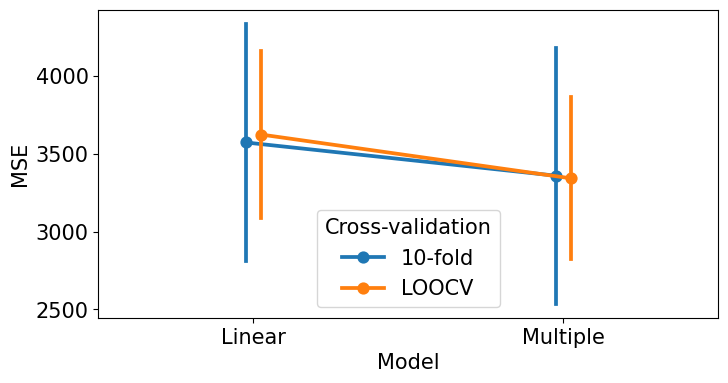

In [ ]:

with sns.plotting_context({'font.size': 15.0}):
  plt.figure(figsize=(8, 4))
  plot = sns.pointplot(results, x = "Model", y = "MSE", hue = "CV", errorbar="se", dodge=True, estimator = "mean", seed=seed)
  plot.legend(title ="Cross-validation",  loc="lower center")
  plt.show()

#**Part Two: Classifying Cells**


Breast cancer is a significant concern in the US, with around 270,000 annual diagnoses and remaining a leading cause of cancer-related death among women. Detecting lumps prompts further tests, such as biopsies, to determine malignancy and potential treatments. While most breast lumps are non-cancerous, malignant lumps require treatment to prevent metastasis and are distinguishable from benign lumps.  

**Wisconsin Breast Cancer Database**  


The Wisconsin Breast Cancer Database comprises 569 cell scans from breast tissue biopsies. Utilizing image recognition, features like cell radius, perimeter, and texture were computed to describe cell shape and texture. The dataset also specifies whether samples are benign or malignant, enabling supervised learning. Malignant cells are labeled as `Diagnosis=1`, while benign cells are marked as `Diagnosis=0`.  

The Python code below imports the breast cancer dataset and encodes the target column to a binary response variable.

In [ ]:
# Import required packages and functions


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


seed = 123

cancer = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/WisconsinBreastCancerDatabase.csv').dropna()
cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])
cancer

/tmp/ipython-input-3673055886.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])


,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**K-nearest Neighbors Classification Based on Radius and Texture**  


Researchers intend to create a model using radius and texture as input features, simplifying the process for visualizing the decision boundary. Decision boundaries separate classes and are depicted on a scatter plot with varying shading indicating classifications in different regions. This aids in exploring predictions and model behavior adjustments. Taking k-nearest neighbors as an example, alterations in k impact the decision boundary and model performance, prompting investigation.  

**Your task is to fit k-nearest neighbors for classification with k=3, 7, and 11 to a training set.**

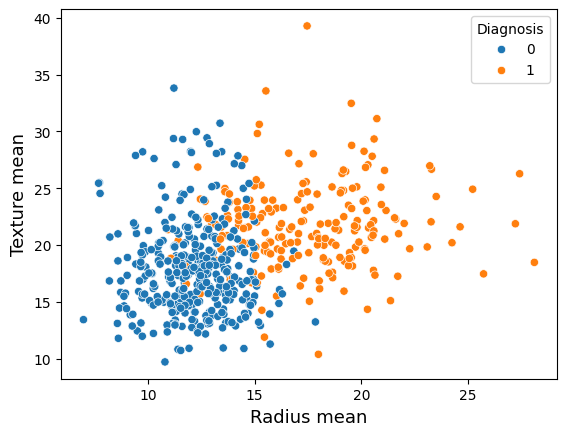

In [ ]:
# Visual exploration
with sns.plotting_context({'xtick.labelsize': 10.0, 'ytick.labelsize': 10.0, 'axes.labelsize': 13.0}):
  sns.scatterplot(cancer,x = "Radius mean", y= "Texture mean", hue = "Diagnosis")
  plt.show()

In [ ]:
# Define input and output features based on the scatterplot variables.
X = cancer[["Radius mean", "Texture mean"]]
y = cancer[["Diagnosis"]]

scaler = StandardScaler()
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), random_state = seed, test_size=0.3)

# Scale the input features}
X_train_scaled =  pd.DataFrame(scaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)


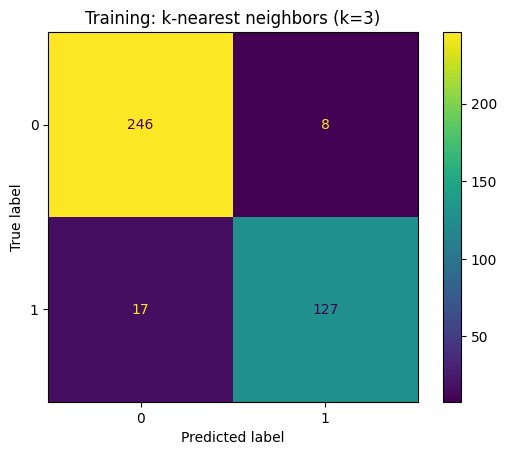

Accuracy: 0.9371859296482412
Precision: 0.9407407407407408
Recall: 0.8819444444444444


In [ ]:
# Fit k-nearest neighbors with k=3
knn_classifer = KNeighborsClassifier(n_neighbors=3)
knn_classifer.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)


# Confusion matrix
predictions = knn_classifer.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])
cmTrain_plot = ConfusionMatrixDisplay(cm)


cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=3)")
plt.show()

# Calculate accuracy, precision, and recall
tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

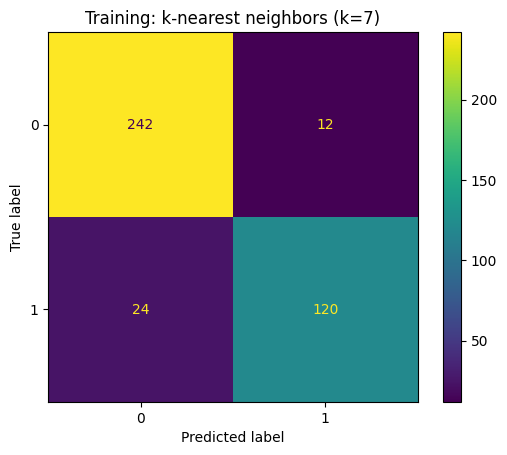

Accuracy: 0.9095477386934674
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [ ]:
# Fit k-nearest neighbors with k=7
knn_classifer = KNeighborsClassifier(n_neighbors=7)
knn_classifer.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)

# Confusion matrix
predictions = knn_classifer.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])
cmTrain_plot = ConfusionMatrixDisplay(cm)


cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=7)")
plt.show()

# Calculate accuracy, precision, and recall
tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

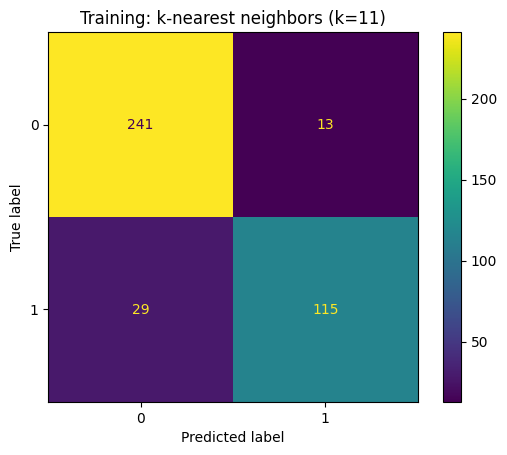

Accuracy: 0.8944723618090452
Precision: 0.8984375
Recall: 0.7986111111111112


In [ ]:
# Fit k-nearest neighbors with k=7
knn_classifer = KNeighborsClassifier(n_neighbors=11)
knn_classifer.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)

# Confusion matrix


predictions = knn_classifer.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])

cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=11)")
plt.show()

# Calculate accuracy, precision, and recall
tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)

# Calculate accuracy, precision, and recall


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

**Support Vector Classification Based on Radius and Texture**  


Support vector machines (SVMs) are an alternative classification model that, similar to k-nearest neighbors, relies on choosing specific hyperparameters. These hyperparameters are values that define variations within a machine learning model. While k-nearest neighbors involves the hyperparameter k (number of neighbors), SVMs have multiple hyperparameters, such as the kernel function and the slope of the loss function.  


**Your task is to fit three support vector classifiers using different basis functions.**


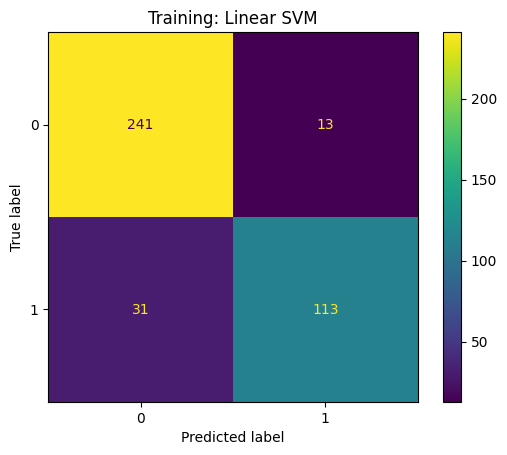

Accuracy: 0.8894472361809045
Precision: 0.8968253968253969
Recall: 0.7847222222222222


In [ ]:
# Fit SVM with the linear kernel
linerSVM = SVC(kernel="linear")
linerSVM.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)
# Confusion matrix

predictions = linerSVM.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])
cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Linear SVM")
plt.show()

# Calculate accuracy, precision, and recall

tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

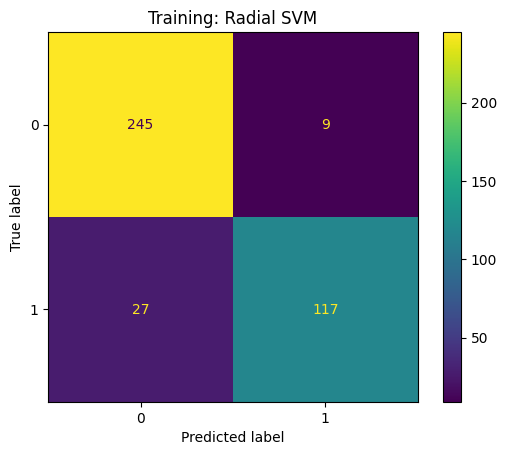

Accuracy: 0.9095477386934674
Precision: 0.9285714285714286
Recall: 0.8125


In [ ]:
# Fit SVM with the Radial Basis Function kernel
Radial_Basis_Function_SVM = SVC(kernel="rbf")
Radial_Basis_Function_SVM.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)

# Confusion matrix
predictions = Radial_Basis_Function_SVM.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])
cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Radial SVM")
plt.show()

# Calculate accuracy, precision, and recall
tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

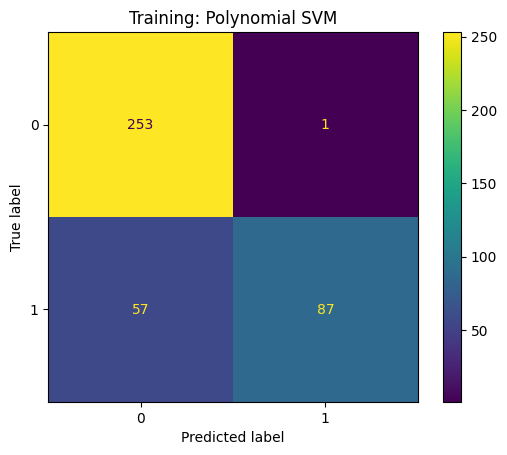

Accuracy: 0.8542713567839196
Precision: 0.9886363636363636
Recall: 0.6041666666666666


In [ ]:
# Fit SVM with the polynomila kernel
Polynomial_SVM = SVC(kernel="poly")
Polynomial_SVM.fit(X_train_scaled[["Radius mean", "Texture mean"]], y_train)

# Confusion matrix

predictions = Polynomial_SVM.predict(X_train_scaled[["Radius mean", "Texture mean"]])
cm = confusion_matrix(y_train, predictions, labels=[0,1])
cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Polynomial SVM")
plt.show()

# Calculate accuracy, precision, and recall
tn, fp, fn, tp = cm.ravel().tolist()
accuracy = (tn + tp) / (tn + fp+ fn+tp)
precision = tp / (tp + fp)
recall = tp / (tp+ fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)